## Adding labels to Seaborn plots

**AIM**: This workbook describes how to include labels to Seaborn line charts

### 1. Load required libraries

In [1]:
# Pandas and os for data ingestion and file manipulation
import pandas as pd
import os

Loading also specific Seaborn libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme(style="darkgrid")

### 2. Build path to project folder 

In this section, I build the path to the \data project folder where I can load any .xlsx or .csv file into Python.

In [3]:
my_wd = os.getcwd()
print("My working directory is:",my_wd)

My working directory is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python/Seaborn_gallery


- I need to change default WD to ML-using-Python folder to access \data sub-folder to ingest Excel file called "INE total and foreign population figures Spain.xlsx"

In [4]:
ML_using_Python_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python')
print('My Python project folder is:',ML_using_Python_folder)

My Python project folder is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


- Then change default folder to this /ML-using-Python folder

In [5]:
os.chdir(ML_using_Python_folder)


In [6]:
new_wd = os.getcwd()
print("Changed default working directory to:",new_wd)

Changed default working directory to: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


### 3. Check data folder file contents

- Check file contents from \data folder and build path to Excel file to be imported into python 

In [7]:
data_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python','data')
data_folder_contents = os.listdir(data_folder)
print('data folder contents:',data_folder_contents)

data folder contents: ['wine_quality.zip', 'winequality.names', 'Monthly-AE-Time-Series-January-2024.xls', 'INE Resident population country of birth Spain.xlsx', 'AE_Time_Series_Data_website.txt', 'winequality-red.csv', 'OCDE_countries_population_figures_1970_2022.csv', 'all_wine_reset.csv', '03_INE_Spain_natural_growh_births_deaths.xlsx', '02 INE Spain CV population stocks and flows 2002 2025.xlsx', 'AE_Attendances_TypeI_2010_2025.csv', 'AE_Attendances_Aug2010_Mar_2025.csv', 'Monthly-AE-Time-Series-March-2025.xls', 'AE_Attendances_2010_2024.csv', 'Type_I_ATT_TEST.csv', 'Type_I_ATT_TRAIN.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xls', 'winequality-white.csv', 'INE total and foreign population figures Spain.xlsx', 'monthly-milk-production-pounds.csv', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'ONS_long_term_immigration_end2024.xlsx', '01 INE resident population by nationality Spain and CV 2002 2024.xl

#### 3.1 I want to import a .csv file for this script

- Scan data_folder contents to list all .xlsx files. I want import "AE_Attendances_Aug2010_Mar_2025.csv" file that includes Attendances and Admissions for the 2010-2025 time period.

In [8]:
for files in os.listdir(data_folder):
    if files.endswith('.csv'):
        print(files)
    else:
        continue

winequality-red.csv
OCDE_countries_population_figures_1970_2022.csv
all_wine_reset.csv
AE_Attendances_TypeI_2010_2025.csv
AE_Attendances_Aug2010_Mar_2025.csv
AE_Attendances_2010_2024.csv
Type_I_ATT_TEST.csv
Type_I_ATT_TRAIN.csv
winequality-white.csv
monthly-milk-production-pounds.csv


### 4. Import Aug2010_Mar_2025 csv file into Python

- From the above set of files, I want to import "AE_Attendances_Aug2010_mar_2025.csv" into Python and split it into Type I Attendances, Type II Attendances and Type III Attendances, as three independent .csv files.

In [15]:
Attendances_file = os.path.join('data','AE_Attendances_Aug2010_Mar_2025.csv')

- Import above .csv file into pyhon. Using the "parse_dates" argument from pd.read_csv() function for the specific **date** columns in our .csv file called **Period**. As this pd.read_csv(Attendances_file, parse_dates = ['Period'])

In [16]:
AE_data = pd.read_csv(Attendances_file, 
                      parse_dates=['Period'])
AE_data.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-01-08,1138652,54371,559358
1,2010-01-09,1150728,55181,550359
2,2010-01-10,1163143,54961,583244
3,2010-01-11,1111295,53727,486005
4,2010-01-12,1159204,45536,533001


In [12]:
AE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     176 non-null    datetime64[ns]
 1   Type1_ATT  176 non-null    int64         
 2   Type2_ATT  176 non-null    int64         
 3   Type3_ATT  176 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


In [13]:
AE_data.columns

Index(['Period', 'Type1_ATT', 'Type2_ATT', 'Type3_ATT'], dtype='object')

In [14]:
AE_data.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-01-08,1138652,54371,559358
1,2010-01-09,1150728,55181,550359
2,2010-01-10,1163143,54961,583244
3,2010-01-11,1111295,53727,486005
4,2010-01-12,1159204,45536,533001


### 6. Create new Column Total_ATT

- Create new column called Total_ATT as a combination of Type1_ATT, Type2_ATT and Type3_ATT

In [17]:
AE_data['Total_ATT'] = AE_data['Type1_ATT'] + AE_data['Type2_ATT'] + AE_data['Type3_ATT']
AE_data.head() 

,Period,Type1_ATT,Type2_ATT,Type3_ATT,Total_ATT
0,2010-01-08,1138652,54371,559358,1752381
1,2010-01-09,1150728,55181,550359,1756268
2,2010-01-10,1163143,54961,583244,1801348
3,2010-01-11,1111295,53727,486005,1651027
4,2010-01-12,1159204,45536,533001,1737741


### 5. Subset 2011 data 

In [95]:
# To slice data using Period column I need first to setup Period as index
df_2011 = df.copy()
print(df_2011)
# Slice data using Period colum
# df_2011 = df.loc['2011-01-01':'2011-12-01']
# df_2011

        Period  Type1_ATT  Type2_ATT  Type3_ATT
0   2010-08-01    1138652      54371     559358
1   2010-09-01    1150728      55181     550359
2   2010-10-01    1163143      54961     583244
3   2010-11-01    1111295      53727     486005
4   2010-12-01    1159204      45536     533001
..         ...        ...        ...        ...
171 2024-11-01    1428050      47263     835916
172 2024-12-01    1440311      44041     861582
173 2025-01-01    1359026      49486     809618
174 2025-02-01    1271336      45682     764860
175 2025-03-01    1450686      51237     887141

[176 rows x 4 columns]


In [97]:
df_2011.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-08-01,1138652,54371,559358
1,2010-09-01,1150728,55181,550359
2,2010-10-01,1163143,54961,583244
3,2010-11-01,1111295,53727,486005
4,2010-12-01,1159204,45536,533001


In [98]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     176 non-null    datetime64[ns]
 1   Type1_ATT  176 non-null    int64         
 2   Type2_ATT  176 non-null    int64         
 3   Type3_ATT  176 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


In [99]:
df_2011.set_index("Period")

,Type1_ATT,Type2_ATT,Type3_ATT
Period,,,
2010-08-01,1138652,54371,559358
2010-09-01,1150728,55181,550359
2010-10-01,1163143,54961,583244
2010-11-01,1111295,53727,486005
2010-12-01,1159204,45536,533001
...,...,...,...
2024-11-01,1428050,47263,835916
2024-12-01,1440311,44041,861582
2025-01-01,1359026,49486,809618


In [100]:
df_2011.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     176 non-null    datetime64[ns]
 1   Type1_ATT  176 non-null    int64         
 2   Type2_ATT  176 non-null    int64         
 3   Type3_ATT  176 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


In [ ]:
# This .loc method does not seems to work with datetime64 columns
df_2011_subset = df_2011.loc['2011-01-01':'2011-12-01']


In [105]:
df_2011_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     0 non-null      datetime64[ns]
 1   Type1_ATT  0 non-null      int64         
 2   Type2_ATT  0 non-null      int64         
 3   Type3_ATT  0 non-null      int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 132.0 bytes


In [104]:
print(df_2011_subset)

Empty DataFrame
Columns: [Period, Type1_ATT, Type2_ATT, Type3_ATT]
Index: []


- Check setting Period as Index to slide data just for 2011 period

In [56]:
AE_data_test.columns

Index(['Period', 'Type1_ATT', 'Type2_ATT', 'Type3_ATT'], dtype='object')

In [67]:
AE_data_test = AE_data_test.set_index("Period")
AE_data_test

,Type1_ATT,Type2_ATT,Type3_ATT
Period,,,
01/08/2010,1138652,54371,559358
01/09/2010,1150728,55181,550359
01/10/2010,1163143,54961,583244
01/11/2010,1111295,53727,486005
01/12/2010,1159204,45536,533001
...,...,...,...
01/11/2024,1428050,47263,835916
01/12/2024,1440311,44041,861582
01/01/2025,1359026,49486,809618


In [68]:
AE_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 01/08/2010 to 01/03/2025
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Type1_ATT  176 non-null    int64
 1   Type2_ATT  176 non-null    int64
 2   Type3_ATT  176 non-null    int64
dtypes: int64(3)
memory usage: 5.5+ KB


- Then I need to transform the other columns into numeric ones. Using pandas.to_numeric() method
- AE_data["Type1_ATT"] = pd.to_numeric(AE_data["Type1_ATT"])

In [73]:
AE_data_test.head()

,Type1_ATT,Type2_ATT,Type3_ATT
Period,,,
01/08/2010,1138652,54371,559358
01/09/2010,1150728,55181,550359
01/10/2010,1163143,54961,583244
01/11/2010,1111295,53727,486005
01/12/2010,1159204,45536,533001


- Then as Period is set as index, I can subset 2011 data

In [74]:
AE_data_test_2011 = AE_data_test.loc['01/08/2010':'01/09/2010']
AE_data_test_2011.head()

,Type1_ATT,Type2_ATT,Type3_ATT
Period,,,
01/08/2010,1138652,54371,559358
01/09/2010,1150728,55181,550359


### 5. Plot a Seaborn chart to add labels to it

- Start by selecting just Period and Type3_ATT columns from previous dataset

In [24]:
AE_data_plot = AE_data.copy()

In [25]:
AE_data_plot = AE_data_plot[['Period','Type3_ATT']]
AE_data_plot.head()

,Period,Type3_ATT
0,2010-01-08,559358
1,2010-01-09,550359
2,2010-01-10,583244
3,2010-01-11,486005
4,2010-01-12,533001


In [30]:
type(AE_data_plot)

NoneType

- Then we need to setup Period as our index to use .loc() to subset just 2011 data

In [28]:
AE_data_plot = AE_data_plot.set_index("Period",inplace=True)
AE_data_plot

AttributeError: 'NoneType' object has no attribute 'set_index'

- Then test initial plot for one year of data (2010)

In [23]:
AE_data_plot_2010 = AE_data_plot.loc['2010-01-08':'2011-12-01']
AE_data_plot_2010.head()

,Period,Type3_ATT


From the previous  AE_data Dataframe we will subset Type3_ATT to plot a Seaborn chart and to add labels to it

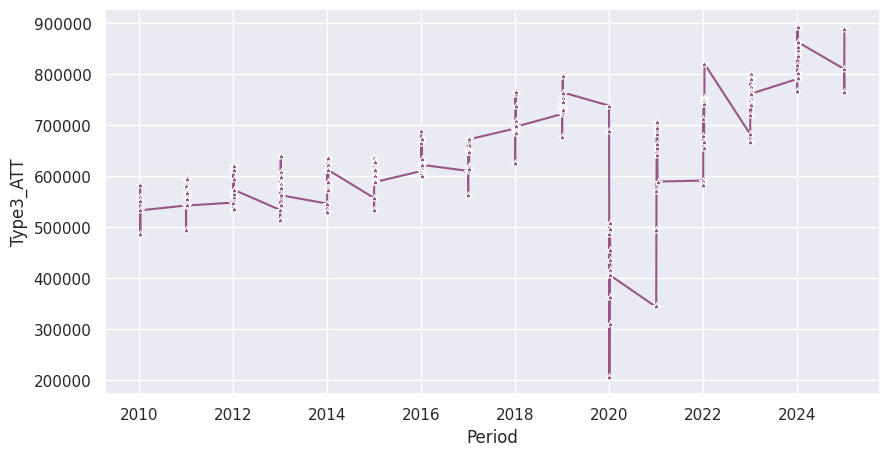

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='Period',y='Type3_ATT',data = AE_data, marker = '*', color = '#965786')